# EDA on terrorism dataset 

Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import matplotlib as mpl

Reading and understanding dataset

In [3]:
df=pd.read_csv('terrorism.csv',low_memory=False)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [6]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


Converting all coloumn names into understandabl format

In [7]:

df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'state'
                    ,'city':'City','latitude':'Latitude','longitude':'Longitude','location':'Location','summary':'Summary'
                    ,'attacktype1_txt':'Attack Type','targtype1_txt':'Target Type','targtsubtype1_txt':'Target Sub Type','gname':'Group Name','natlty1_txt':'Nationality','motive':'Motive'
                    ,'weaptype1_txt':'Weapon Type','weapsubtype1_txt':'Weapon Subtype','nkill':'Killed','nwound':'Wounded','addnotes':'Add Notes'} ,inplace=True)
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,Add Notes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.isnull().sum() # Cheacking null values

eventid            0
Year               0
Month              0
Day                0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [37]:
df['Killed']=df['Killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)
df['Casuality']=df['Killed']+df['Wounded']

In [10]:
df.nunique() #total number of unique values

eventid       181691
Year              47
Month             13
Day               32
approxdate      2244
               ...  
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Casuality        345
Length: 136, dtype: int64

In [11]:
df.describe()

,eventid,Year,Month,Day,extended,country,region,Latitude,Longitude,specificity,...,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,Casuality
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952,5.150156
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325,40.555416
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000,1.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000,9574.000000


In [12]:
print(df.columns)

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY', 'related', 'Casuality'],
      dtype='object', length=136)


In [13]:
df['Killed'].max()

1570.0

In [14]:
print(df.loc[df['Killed'] == 1570, 'Year'])
print(df.loc[df['Killed'] == 1570, 'Country'])
#checking which year,counrty maximum deaths had happened

133518    2014
Name: Year, dtype: int64
133518    Iraq
Name: Country, dtype: object


In [15]:
print(df['Wounded'].max())
print(df.loc[df['Wounded'] == df['Wounded'].max(), 'Year'])
print(df.loc[df['Wounded'] == df['Wounded'].max(), 'Country'])

8191.0
73127    2001
Name: Year, dtype: int64
73127    United States
Name: Country, dtype: object


In [16]:
print(df['Casuality'].max())
print(df.loc[df['Casuality'] == df['Casuality'].max(), 'Year'])
print(df.loc[df['Casuality'] == df['Casuality'].max(), 'Country'])

9574.0
73126    2001
73127    2001
Name: Year, dtype: int64
73126    United States
73127    United States
Name: Country, dtype: object


## Inference from the above data:
### Maximum number of people killed was in Iraq in the year 2014, with 1570 deaths
### Maximum number of casualities was in the USA in the year 2001, with 9574 casualities
### Maximum number of people wounded was in the USA in the year 2001, with 8191 people wounded

<AxesSubplot:title={'center':'Attack Count by year'}, xlabel='Year', ylabel='count'>

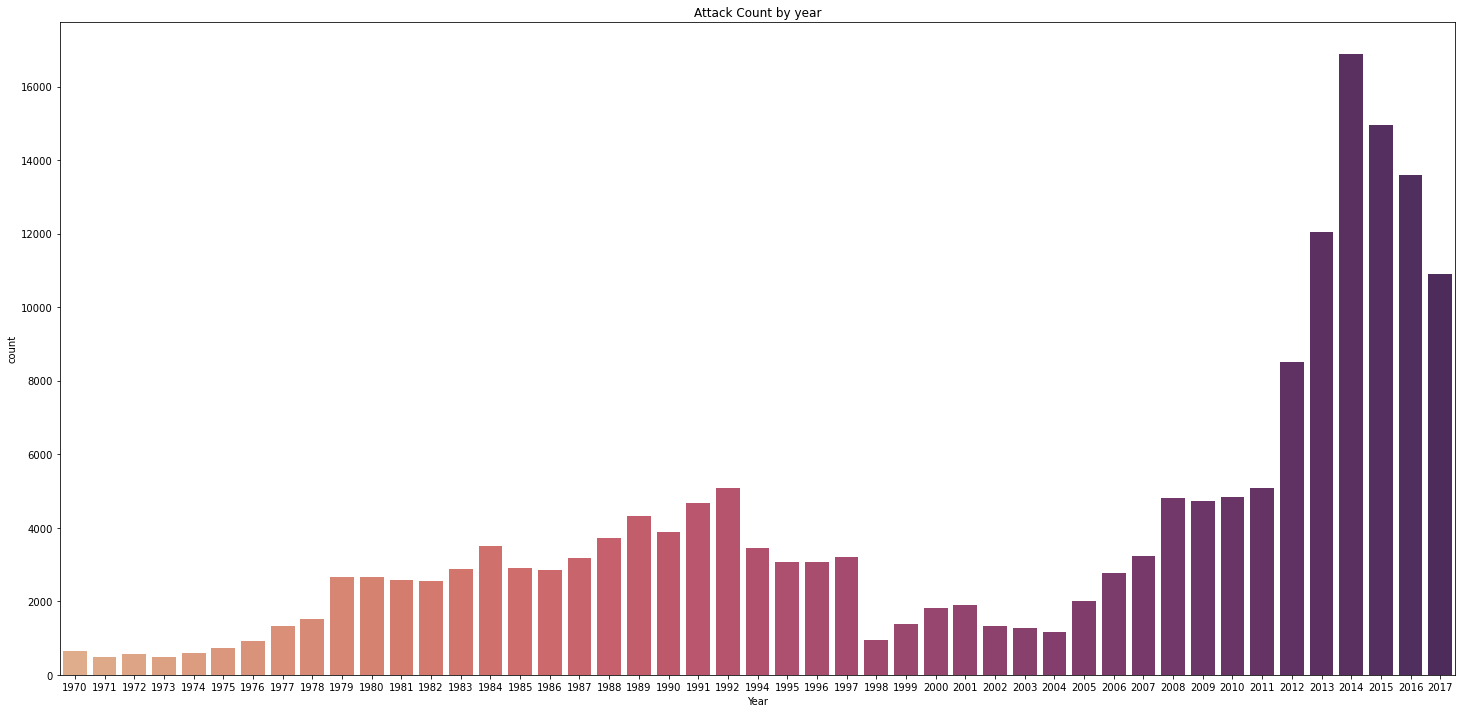

In [17]:
plt.figure(figsize=(25,12)) 
plt.title("Attack Count by year")
sns.countplot(x ='Year', data = df, palette='flare') 

In [18]:
df= df[['Year','Month','Day','Country','Region','City','state','Latitude','Longitude','Attack Type','Target Type','Group Name','Motive','Weapon Type','Killed','Wounded','Summary']]

In [19]:
df

,Year,Month,Day,Country,Region,City,state,Latitude,Longitude,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Summary
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Mexico city,Federal,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Athens,Attica,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,0.0,0.0,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,Middle Shebelle,2.359673,45.385034,Armed Assault,Military,Al-Shabaab,NaN,Firearms,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,Lattakia,35.407278,35.942679,Bombing/Explosion,Military,Muslim extremists,NaN,Explosives,2.0,7.0,12/31/2017: Assailants launched mortars at the...
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,Maguindanao,6.900742,124.437908,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),NaN,Incendiary,0.0,0.0,12/31/2017: Assailants set fire to houses in K...
181689,2017,12,31,India,South Asia,Imphal,Manipur,24.798346,93.940430,Bombing/Explosion,Government (General),Unknown,NaN,Explosives,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...


In [60]:
df['Latitude'].dropna()

0         18.456792
1         19.371887
2         15.478598
3         37.997490
4         33.580412
            ...    
181686     2.359673
181687    35.407278
181688     6.900742
181689    24.798346
181690     7.209594
Name: Latitude, Length: 177135, dtype: float64

In [65]:
df['Longitude'].dropna()

0         -69.951164
1         -99.086624
2         120.599741
3          23.762728
4         130.396361
             ...    
181686     45.385034
181687     35.942679
181688    124.437908
181689     93.940430
181690    124.241966
Name: Longitude, Length: 177134, dtype: float64

Most active organizations:
 Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Name: Group Name, dtype: int64


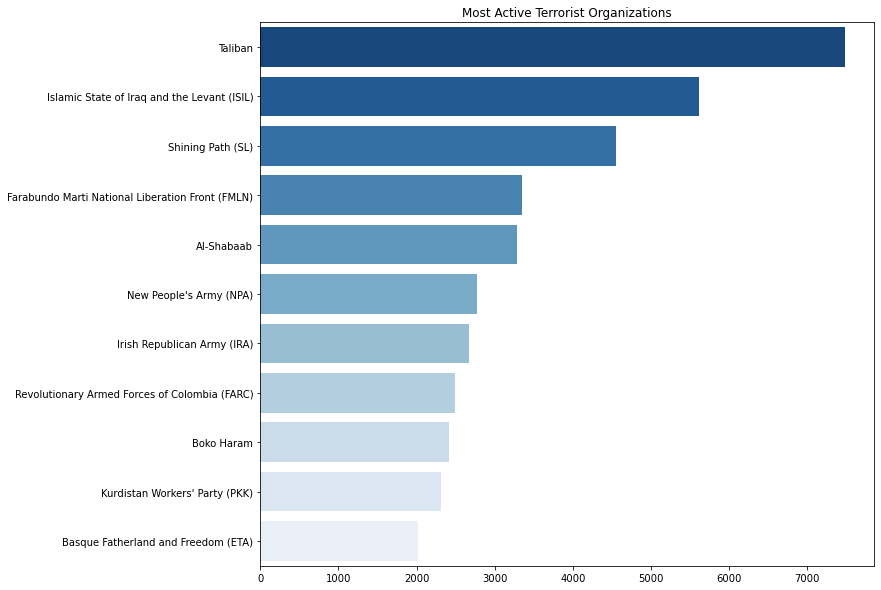

In [20]:
print('Most active organizations:\n',df['Group Name'].value_counts().head())

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group Name'].value_counts()[1:12].index,x=df['Group Name'].value_counts()[1:12].values,palette='Blues_r')
plt.title('Most Active Terrorist Organizations')
#plt.xticks(rotation=90)
plt.show()

Attack Type:
 Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: Attack Type, dtype: int64


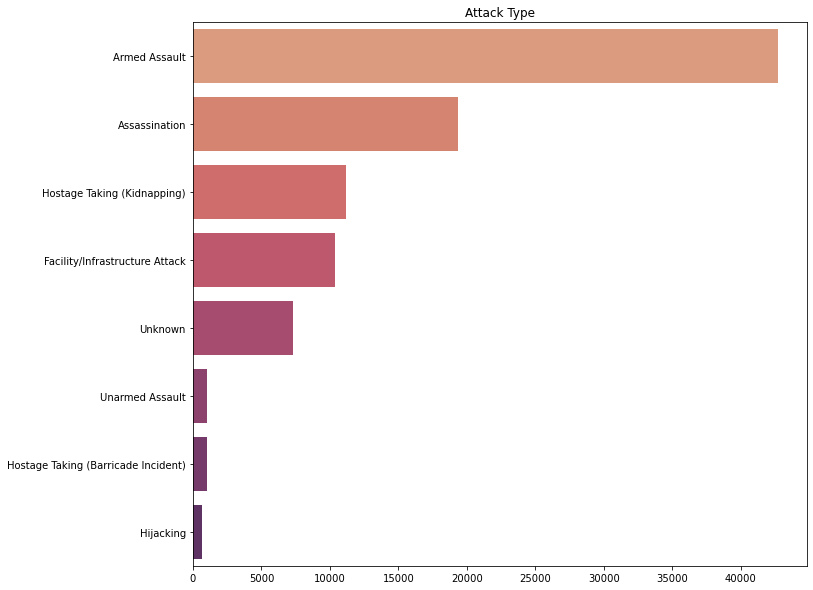

In [21]:
print('Attack Type:\n',df['Attack Type'].value_counts().head())

plt.subplots(figsize=(11,10))
sns.barplot(y=df['Attack Type'].value_counts()[1:12].index,x=df['Attack Type'].value_counts()[1:12].values,palette='flare')
plt.title('Attack Type')
#plt.xticks(rotation=90)
plt.show()

## Most of the attacks worldwide were carried out by Taliban, by using explosives

In [22]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

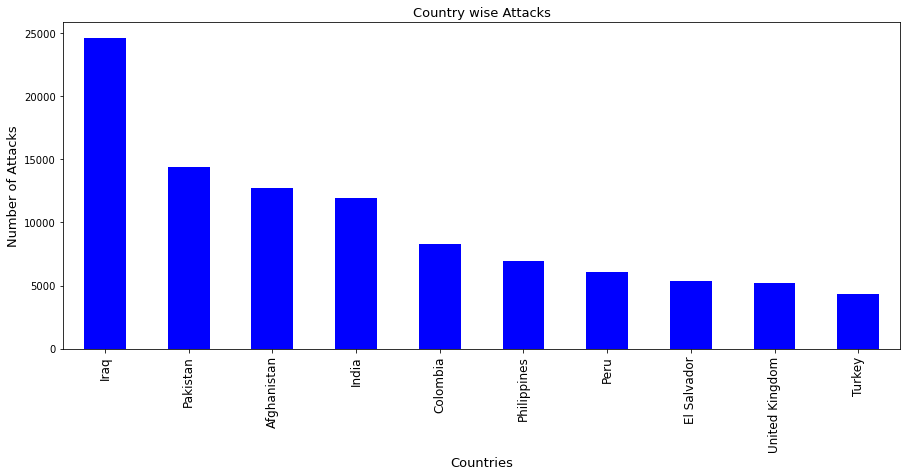

In [23]:
ct.plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [24]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

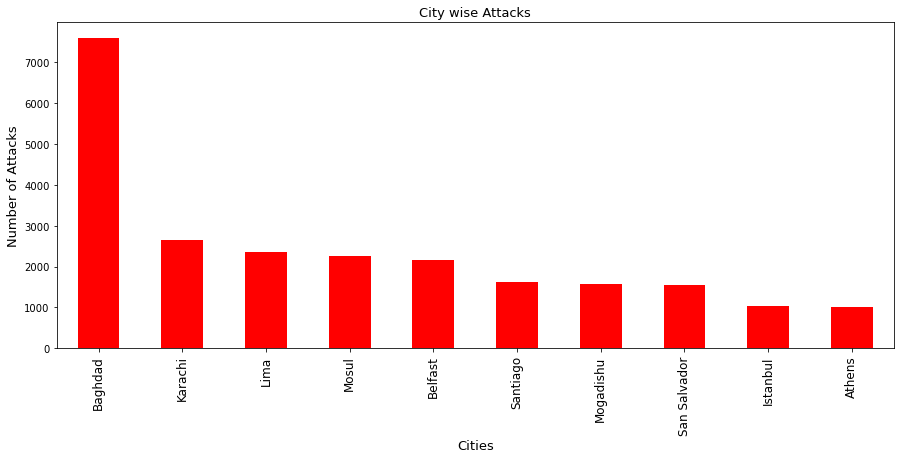

In [25]:
city.plot(kind="bar",color="red",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

## Baghdad, the capital of Iraq is an attack-prone hot zone. 

In [26]:
gca=df[["Group Name","Country"]].value_counts().drop("Unknown")
gca.head(10)

C:\Users\aswin\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Group Name                                        Country       
Taliban                                           Afghanistan       7423
Islamic State of Iraq and the Levant (ISIL)       Iraq              4797
Shining Path (SL)                                 Peru              4541
Farabundo Marti National Liberation Front (FMLN)  El Salvador       3330
Al-Shabaab                                        Somalia           2867
New People's Army (NPA)                           Philippines       2770
Irish Republican Army (IRA)                       United Kingdom    2575
Revolutionary Armed Forces of Colombia (FARC)     Colombia          2468
Kurdistan Workers' Party (PKK)                    Turkey            2109
Boko Haram                                        Nigeria           2087
dtype: int64

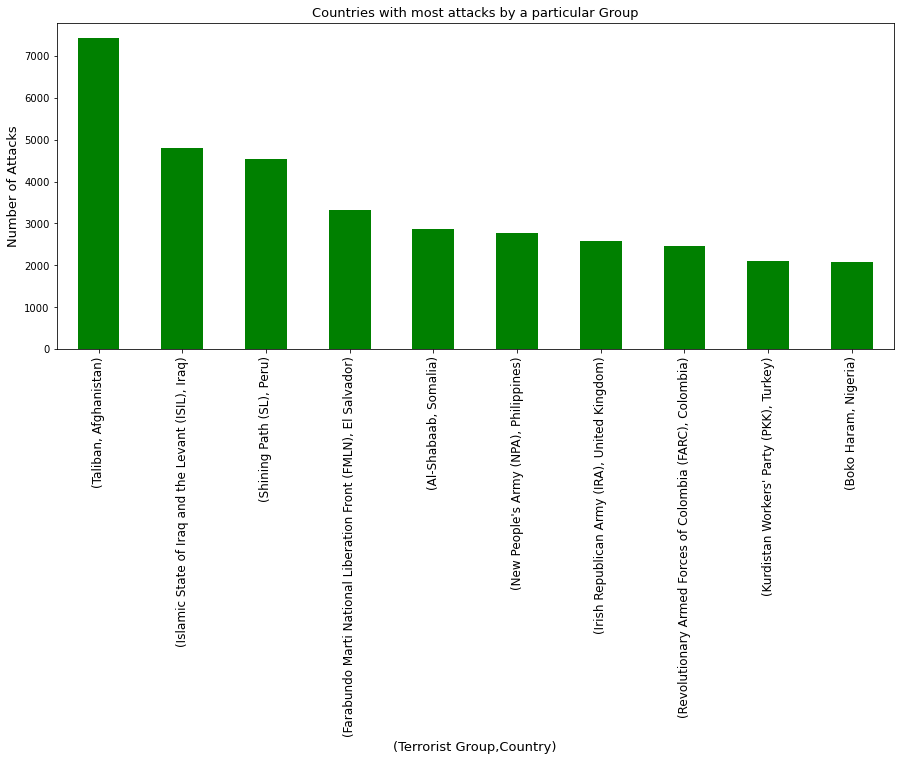

In [27]:
gca.head(10).plot(kind="bar",color="green",figsize=(15,6))
plt.title("Countries with most attacks by a particular Group",fontsize=13)
plt.xlabel("(Terrorist Group,Country)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [29]:
tg=df[["Target Type","Group Name"]].value_counts().drop("Unknown")
tg.head(10)

Target Type                     Group Name                                 
Private Citizens & Property     Unknown                                        20784
Government (General)            Unknown                                        11337
Police                          Unknown                                        10412
Business                        Unknown                                         9151
Military                        Unknown                                         9015
Transportation                  Unknown                                         3168
Police                          Taliban                                         2535
Religious Figures/Institutions  Unknown                                         2506
Educational Institution         Unknown                                         2450
Private Citizens & Property     Islamic State of Iraq and the Levant (ISIL)     2240
dtype: int64

### Most of the attacks were directed towards Private Citizen and Government Officials

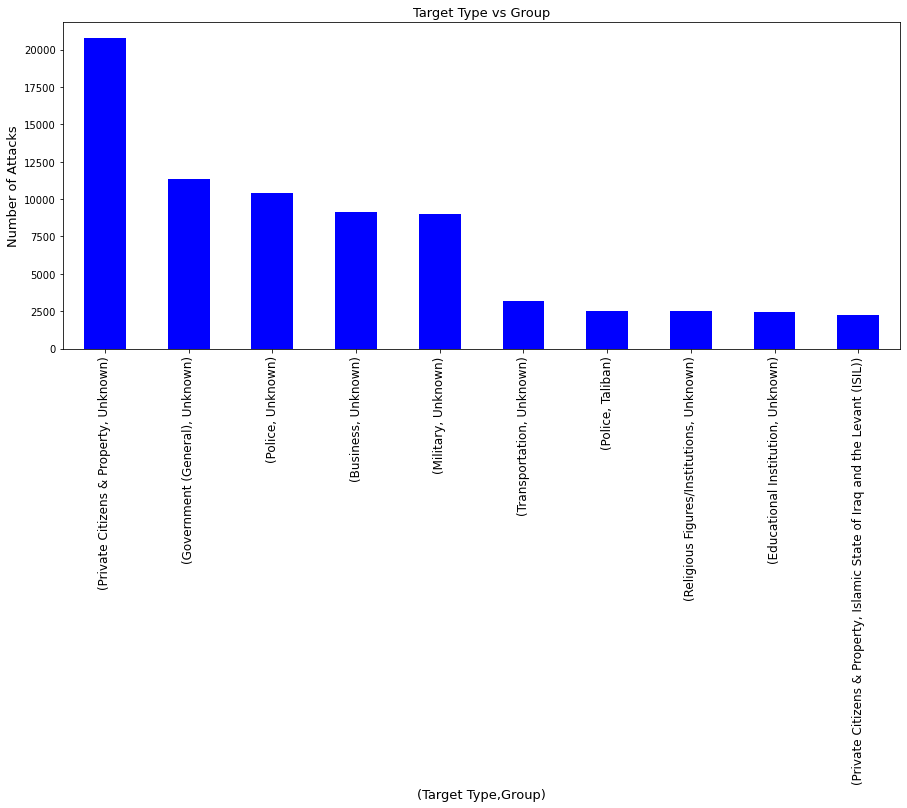

In [31]:
tg.head(10).plot(kind="bar",color="blue",figsize=(15,6))
plt.title("Target Type vs Group",fontsize=13)
plt.xlabel("(Target Type,Group)",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [40]:
df['Casuality']=df['Wounded']+df['Killed']
terror1 = df.sort_values(by='Casuality',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='Casuality')
heat.fillna(0,inplace=True)
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [42]:
!pip install folium
import folium
from folium.plugins import MarkerCluster 
filterYear = df['Year'] == 1970

In [50]:
df["Group Name"].value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group Name, dtype: int64

In [79]:
terror_df_group = df.dropna(subset=['Latitude','Longitude'])
terror_df_group = terror_df_group.drop_duplicates(subset=['Country','Group Name'])
terrorist_groups = df['Group Name'].value_counts()[1:8].index.tolist()
terror_df_group = terror_df_group.loc[terror_df_group['Group Name'].isin(terrorist_groups)]
print(terror_df_group['Group Name'].unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [80]:
map = folium.Map(location=[20, 0], tiles="CartoDB positron", zoom_start=2)
markerCluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(terror_df_group)):
    folium.Marker([terror_df_group.iloc[i]['Latitude'],terror_df_group.iloc[i]['Longitude']], 
                  popup='Group:{}<br>Country:{}'.format(terror_df_group.iloc[i]['Group Name'], 
                  terror_df_group.iloc[i]['Country'])).add_to(map)
map

### Most of the attacks are centered around East-Asian and Mexico-US regions

## Conclusion:
### Most of the attacks took place in the year 2014
### Highest deaths was in Iraq in 2014 with 1570 deaths
### Highest number of casualities recorded were in US in the year 2001 with 9574 casualities
### The most attacked region was Baghadh, Iraq
### Most of the attacks were carried out by the Taliban organisation in Afghanistan 
### Terrorists used "Explosives" as the most common method to attack
### The attacks were generally targeted towards private citizens and government officials